## Chapter 10. 케라스를 사용한 인공 신경망 소개

#### 10.1 생물학적 뉴런에서 인공 뉴런까지

#### 퍼셉트론

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import warnings; warnings.filterwarnings('ignore')

iris = load_iris()
X = iris.data[:, (2, 3)] # 꽃잎의 길이와 너비
y = (iris.target == 0).astype(np.int) # 부채붓꽃(Iris Setosa)인가?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

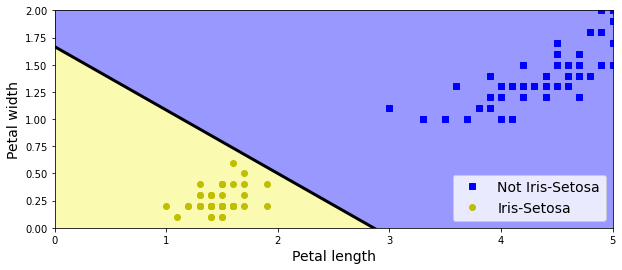

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

#### 10.2 케라스로 다층 퍼셉트론 구현하기

In [3]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.8.0'

In [4]:
# tf.keras 에서 구현된 케라스 API 버젼 -tf 접미사는 tf.keras가 텐서플로 특화된 기능이 추가되어 케라스 API를 구현했다는 것을 나타냄
keras.__version__

'2.8.0'

In [5]:
# 케라스를 사용해 데이터셋 적재하기
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

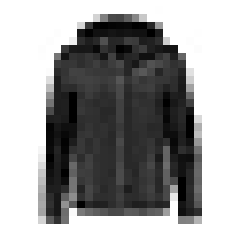

In [9]:
# matplotlib.pyplot 의 imshow() 함수와 'binary' 컬러맵을 사용해 이미지 출력  가능
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [10]:
# 0~9 까지 클래스 아이디
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
# 첫 이미지는 코트
class_names[y_train[0]]

'Coat'

#### 시퀀셜 API를 사용해 모델 만들기

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [17]:
model.layers

In [18]:
hidden_1 = model.layers[1]
hidden_1.name

'dense_3'

In [19]:
model.get_layer('dense_3') is hidden_1

True

In [20]:
weights, biases = hidden_1.get_weights()
weights

array([[-0.0732683 ,  0.0200207 ,  0.04383746, ...,  0.06127423,
        -0.0370385 ,  0.0236858 ],
       [ 0.0130132 , -0.00460425,  0.05448721, ...,  0.01582078,
        -0.07180884, -0.00683349],
       [-0.01503503,  0.01931466,  0.04506316, ...,  0.00159994,
        -0.05689549, -0.02431904],
       ...,
       [-0.00799527, -0.05167049, -0.0726399 , ..., -0.01974528,
        -0.01039433,  0.02747372],
       [-0.00514467,  0.01515153,  0.04886669, ..., -0.03794606,
        -0.06385615,  0.06469689],
       [-0.04166171, -0.07298885, -0.03153659, ..., -0.07256171,
        -0.03752777, -0.07372734]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
biases.shape

(300,)

#### 모델 컴파일

In [24]:
model.compile(loss = 'sparse_categorical_crossentropy',
            optimizer = 'sgd',
            metrics = ['accuracy'])

#### 모델 훈련과 평가

In [25]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 2ms/step - loss: 0.7352 - accuracy: 0.7553 - val_loss: 0.5422 - val_accuracy: 0.8052
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4895 - accuracy: 0.8290 - val_loss: 0.4587 - val_accuracy: 0.8424
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4434 - accuracy: 0.8449 - val_loss: 0.4124 - val_accuracy: 0.8602
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4162 - accuracy: 0.8545 - val_loss: 0.4018 - val_accuracy: 0.8604
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3943 - accuracy: 0.8625 - val_loss: 0.3870 - val_accuracy: 0.8650
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3784 - accuracy: 0.8671 - val_loss: 0.3748 - val_accuracy: 0.8660
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3653 - accuracy: 0.8696 - val_loss: 0.3741 - val_accuracy:

In [26]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [27]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

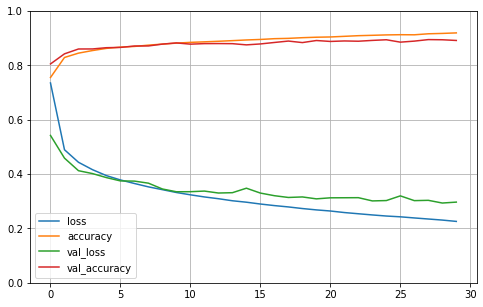

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # 수직축 범위를 [0-1] 사이로 설정
plt.show()

In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3241 - accuracy: 0.8833


[0.32409924268722534, 0.8833000063896179]

#### 모델을 사용해 예측을 만들기

In [31]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [32]:
# 모델이 예측한 정답
np.argmax(y_proba, axis=1)

array([9, 2, 1], dtype=int64)

In [33]:
np.array(class_names)[np.argmax(y_proba, axis=1)]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [34]:
# 실제 정답
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

#### 시퀀셜 API를 사용해 회귀용 다층 퍼셉트론 만들기

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [36]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20,
                    validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # 새로운 샘플
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0698 - val_loss: 4.9907
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.4924 - val_loss: 0.4991
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4525 - val_loss: 0.4539
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4174 - val_loss: 0.4040
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4047 - val_loss: 0.3941
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3948 - val_loss: 0.3889
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3865 - val_loss: 0.4246
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3854 - val_loss: 0.3839
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3795 - val_loss: 0.3913
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3759 - val_loss: 0.4512

#### 함수형 API를 사용해 복잡한 모델 만들기

In [37]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])